# Исследование: музыка больших городов

## Введение

Данное исследование **построено на данных** портала Яндекс.Музыка для Москвы и Санкт-Петербурга и **направлено на** изучение особенностей вкусов потребителей.

**Потребность в данном исследовании обусловлена** необходимостью поддержания интереса к продукту и привлечения новых пользователей, обеспечения узнаваемости бренда. Одним из вопросов, на который нам следует ответить: как музыка, которая звучит по дороге на работу в понедельник утром, отличается от той, что играет в среду или в конце рабочей недели? Также нам следует сравнить, что и в каком режиме слушают жители Москвы и Санкт-Петербурга.

Иследование состоит из следующих этапов:
1. [Обзор данных и их предобработка](#step_1):
    * [Импорт библиотек](#step_1.1);
    * [Общая информация о данных](#step_1.2);
    * [Обработка пропусков и дубликатов, проверка данных](#step_1.3);
    * [Вывод](#step_1.4).
2. [Анализ данных](#step_2):
    * [Различия времени прослушивания музыки в разных городах](#step_2.1);
    * [Различия предпочтительных направлений музыки в разные дни недели и время](#step_2.2);
    * [Различия предпочтительных направлений музыки в разных городах](#step_2.3);
    * [Вывод](#step_2.4).
4. [Общий вывод](#step_3);
5. [Рекомендации](#step_4).

**Результатом исследования** являются рекомендации по удержанию интереса и привлечению новых пользователей в портал Яндекс.Музыка для Москвы и Санкт-Петербурга.

## Этап 1. Обзор данных и их предобработка <a id='step_1'></a>

### Импорт библиотек <a id='step_1.1'></a>

In [1]:
import pandas as pd
import numpy as np
from IPython import display

import matplotlib.pyplot as plt

### Общая информация о данных <a id='step_1.2'></a>

Изучим данные, предоставленные сервисом для проекта.

In [2]:
# Прочитаем файл music_project.csv с информацией о логах в приложении и сохраним его в переменной music_project
music_project = pd.read_csv('C:/Users/Public/Jupyter/music_project.csv')
music_project.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


In [3]:
# Получим общую информацию о данных таблицы music_project
display.display(data=music_project.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Рассмотрим полученную информацию подробнее. Всего в таблице 7 столбцов и 65 079 строк, тип данных у каждого столбца - < object >.

Подробно разберём, какие в таблице столбцы, и какую информацию они содержат:
* [`userID`](#id) — идентификатор пользователя;
* [`Track`](#track) — название трека;
* [`artist`](#artist) — имя исполнителя;
* [`genre`](#genre) — название жанра;
* [`City`](#city) — город, в котором происходило прослушивание;
* [`time`](#time) — время, в которое пользователь слушал трек;
* [`Day`](#day) — день недели.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. Это может быть связано с техническими проблемами выгрузки данных, либо некорректно внесённых данных в саму базу данных. Также видим, что для удобства анализа данных столбцы требуют приведения в необходимый вид (удаление пробелов, строковые значения). Изменения типов данных не требуется.

### Обработка пропусков и дубликатов, проверка данных <a id='step_1.3'></a>

#### Замена названий стобцов

При анализе информации об исходных датасетах мы обратили внимание на то, что для дальнейшего анализа необходимо привести названия столбцов таблицы music_project к удобному для анализа виду.

In [4]:
# Получим перечень названий столбцов
music_project.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

В названиях столбцов есть пробелы, которые могут затруднять доступ к данным. Кроме того, названия набраны в разных регистрах и не полностью отражают в краткой форме, какая информация в них содержится, что также может усложнить работу с данными. Переименуем столбцы и проверим результат.

In [5]:
music_project.set_axis(['user_id', 'track_name', 'artist_name', 'genre_name', 'city', 'time', 'weekday'],
                       axis='columns', inplace=True)
music_project.columns

Index(['user_id', 'track_name', 'artist_name', 'genre_name', 'city', 'time',
       'weekday'],
      dtype='object')

Все названия столбцов имеют подходящий для анализа вид.

#### Обработка пропусков

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [6]:
music_project.isnull().sum()

user_id           0
track_name     1231
artist_name    7203
genre_name     1198
city              0
time              0
weekday           0
dtype: int64

Пустые значения свидетельствуют о том, что для некоторых треков доступна не вся информация. Причины могут быть разные: скажем, не назван конкретный исполнитель народной песни. Хуже, если возникли проблемы с записью данных. Каждый отдельный случай необходимо разобрать и выявить причину.

Заменяем пропущенные значения в столбцах с названием трека и исполнителя на строку *'unknown'*.

In [7]:
music_project['track_name'] = music_project['track_name'].fillna('unknown')
music_project['artist_name'] = music_project['artist_name'].fillna('unknown')

В столбце с жанрами есть пустые значения, но их не очень много. Рассчитаем процент пропусков по столбцу `genre_name` к общей выборке.

In [8]:
music_project['genre_name'].isna().mean()

0.018408395949538255

Пропуски составляют всего 2% от общей выборки. Мы можем их удалить, после чего проверить, что пропусков в данных не осталось.

In [9]:
music_project.dropna(subset = ['genre_name'], inplace = True)
music_project.isnull().sum()

user_id        0
track_name     0
artist_name    0
genre_name     0
city           0
time           0
weekday        0
dtype: int64

#### Обработка дубликатов

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [10]:
music_project.duplicated().sum()

3755

In [11]:
music_project = music_project.drop_duplicates().reset_index(drop=True)

In [12]:
music_project.duplicated().sum()

0

Дубликаты могли появиться вследствие сбоя в записи данных. Стоит обратить внимание и разобраться с причинами появления такого «информационного мусора».

Также отметим, что помимо "явных" дубликатов, могут встречаться "неявные". Чтобы убедиться в их отсутствии, следует проверить значения в столбцах.

#### Проверка данных

Изучим значения, которые встречаются в каждом их столбцов таблицы `music_project`.

##### Идентификатор пользователя <a id='id'></a>

In [13]:
music_project['user_id'].describe()

count        60126
unique       41315
top       7D166C63
freq            51
Name: user_id, dtype: object

В данных встречается 60 126 записей, в которых 41 315 уникальных пользователей.

##### Название трека <a id='track'></a>

In [14]:
music_project['track_name'].describe()

count       60126
unique      46910
top       unknown
freq          536
Name: track_name, dtype: object

In [15]:
music_project['track_name'].unique()[:20]

array(['Kamigata To Boots', 'Delayed Because of Accident',
       'Funiculì funiculà', 'Dragons in the Sunset', 'Soul People',
       'Преданная', 'True', 'Feeling This Way',
       'И вновь продолжается бой', 'Pessimist', 'Gool la Mita',
       'Is There Anybody Out There? (Panoramic Paralysis) Mix',
       'Мина син генэ кирэк', 'After School Special',
       'Make Love Whenever You Can', 'SLAVES OF FEAR', 'Веснянка',
       'Pat-a-Cake', 'Sweetback', "Ya'll In Trouble"], dtype=object)

В данных встречается 46 910 уникальных композиций по названию трека.

In [16]:
(music_project
     .groupby('user_id')['track_name']
     .nunique()
     .reset_index()
     .query('track_name > 10')
     .sort_values(by='track_name', ascending=False)
     .reset_index(drop=True)
)

,user_id,track_name
0,E8339398,42
1,B5496034,34
2,D6A03F1E,32
3,B851E1A5,32
4,53B9A51D,28
...,...,...
99,AA950A3A,11
100,9A9E39A0,11
101,71255BAD,11
102,60864740,11


Отметим, что 104 пользователя слушали более 10 треков с разными названиями. Некоторые из них слушали до 42, 34, 32 треков с разными названиями.

In [17]:
(len(music_project
         .groupby('user_id')['track_name']
         .nunique()
         .reset_index()
         .query('track_name == 1'))
)

31762

Также у нас имеется 31 762 пользователей, которые включали либо только один трек, либо треки, имеющие одинаковые названия.

##### Имя исполнителя <a id='artist'></a>

In [18]:
music_project['artist_name'].describe()

count       60126
unique      43344
top       unknown
freq         5990
Name: artist_name, dtype: object

In [19]:
music_project['artist_name'].unique()[:20]

array(['The Mass Missile', 'Andreas Rönnberg', 'Mario Lanza',
       'Fire + Ice', 'Space Echo', 'IMPERVTOR', 'Roman Messer',
       'Polina Griffith', 'unknown', 'Shireen Abdul Wahab',
       'Pink Floyd Floydhead', 'Ильдар Хакимов', 'Detroit Grand Pubahs',
       'Arabesque', 'HEALTH', 'Веданъ Колодъ', 'Mother Goose Club',
       'The Fabulous Three',
       'Lil Tee Chill Tank Young Buck Brother Mohammed and Tara',
       'Exotype'], dtype=object)

В данных встречается 43 344 уникальных исполнителя.

In [20]:
(music_project
     .groupby('user_id')['artist_name']
     .nunique()
     .reset_index()
     .query('artist_name > 10')
     .sort_values(by='artist_name', ascending=False)
     .reset_index(drop=True)
)

,user_id,artist_name
0,E8339398,38
1,B5496034,34
2,B851E1A5,32
3,D6A03F1E,31
4,3E4BFAA7,30
...,...,...
93,E4F8C670,11
94,794B409F,11
95,D540AF61,11
96,D2CE494E,11


Отметим, что 98 пользователей слушали более 10 треков с разными исполнителями. Некоторые из них слушали до 38, 34, 32 треков с разными исполнителями.

In [21]:
(len(music_project
         .groupby('user_id')['artist_name']
         .nunique()
         .reset_index()
         .query('artist_name == 1'))
)

31885

Также у нас имеется 31 885 пользователей, которые включали либо только один трек, либо треки, принадлежащие одному исполнителю.

##### Название жанра <a id='genre'></a>

In [22]:
music_project['genre_name'].describe()

count     60126
unique      287
top         pop
freq       8323
Name: genre_name, dtype: object

In [23]:
music_project['genre_name'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

Сохраним список уникальных значений столбца с жанрами в переменной `genres_list`. Отметим, что некоторые жанры выглядят как неявные дубликаты. Их стоит обработать.

In [24]:
genres_list = music_project['genre_name'].unique()

Объявим функцию `find_genre()` для поиска неявных дубликатов в столбце с жанрами. Например, когда название одного и того же жанра написано разными словами.

In [25]:
def find_genre(genre):
    count_genre = 0
    for row in genres_list:
        if row == genre:
            count_genre += 1
    return count_genre

Вызовем функцию `find_genre()` для поиска различных вариантов названия жанра хип-хоп в таблице. Поищем варианты:
- hiphop
- hip
- hop
- hip-hop

In [26]:
find_genre('hiphop')

1

In [27]:
find_genre('hip')

1

In [28]:
find_genre('hop')

0

In [29]:
find_genre('hip-hop')

0

Объявим функцию `find_right_genre()`, которая заменяет неправильное название нужного жанра в столбце `genre_name` на правильное и проверяет успешность выполнения замены.

Так исправляем все варианты написания, которые выявила проверка.

In [30]:
def find_right_genre(df, right, wrong):
    df['genre_name'] = df['genre_name'].replace(wrong, right)
    result = df[df['genre_name'] == wrong]['genre_name'].count()
    return result

In [31]:
find_right_genre(music_project, 'hiphop', 'hip')

0

Проведём аналогичные процедуры для жанров 'africa' (другое название 'afrikaans'), 'arabesk' (другое название 'arabic'), 'latin' (другое название 'latino'), 'poprussian' (другое название 'ruspop'), 'soul' (другое название 'soulful'), 'türk' (другое название 'türkçe'), 'electronic' (другое название 'электроника').

In [32]:
find_right_genre(music_project, 'afrikaans', 'africa')

0

In [33]:
find_right_genre(music_project, 'latino', 'latin')

0

In [34]:
find_right_genre(music_project, 'ruspop', 'poprussian')

0

In [35]:
find_right_genre(music_project, 'soul', 'soulful')

0

In [36]:
find_right_genre(music_project,  'türkçe', 'türk')

0

In [37]:
find_right_genre(music_project,  'electronic', 'электроника')

0

Проверим, сколько уникальных значений жанров у нас осталось.

In [38]:
music_project['genre_name'].describe()

count     60126
unique      280
top         pop
freq       8323
Name: genre_name, dtype: object

Таким образом, в данных имеются композиции, принадлежащие к 280 разным жанрам.

##### Город <a id='city'></a>

In [39]:
music_project['city'].unique()

array(['Saint-Petersburg', 'Moscow'], dtype=object)

In [40]:
(music_project
     .groupby('city')['user_id']
     .nunique()
     .reset_index()
)

,city,user_id
0,Moscow,29043
1,Saint-Petersburg,12305


Прослушивающих музыку из Москвы в выборке 29 043 пользователя, а из Санкт-Петербурга - 12 305 человек. Поскольку число уникальных пользователей в выборке равно 41 315, а суммарное значение пользователей из Москвы и Санкт-Петербурга выше, некоторые пользователи слушали музыку и в Москве, и в Санкт-Петербурге. В разрезе данной аналитики для нас этот факт не важен. Однако, в случае изменения критериев, возможно, их нужно будет исключить из анализа.

##### Время прослушивания <a id='time'></a>

In [41]:
music_project['time'].sort_values().unique()

array(['08:00:00', '08:00:02', '08:00:03', ..., '22:00:57', '22:00:58',
       '22:00:59'], dtype=object)

У нас имеется информация о прослушивании музыки пользователями с 08:00:00 до 22:00:59.

##### День недели <a id='day'></a>

In [42]:
music_project['weekday'].unique()

array(['Wednesday', 'Friday', 'Monday'], dtype=object)

Данные о прослушивании музыки представлены за Понедельник, Среду и Пятницу.

После преобразования всех данных ещё раз проверим отсутствие дубликатов и пропусков. Убеждаемся, что чистка выполнена успешно.

In [43]:
music_project.duplicated().sum()

0

In [44]:
music_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60126 entries, 0 to 60125
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      60126 non-null  object
 1   track_name   60126 non-null  object
 2   artist_name  60126 non-null  object
 3   genre_name   60126 non-null  object
 4   city         60126 non-null  object
 5   time         60126 non-null  object
 6   weekday      60126 non-null  object
dtypes: object(7)
memory usage: 3.2+ MB


### Вывод <a id='step_1.4'></a>

У нас имеются данные с информацией о прослушивании музыки пользователями. При этом каждое из зафиксированных в данных прослушиваний характеризуется семью признаками: идентификатором пользователя, названием трека, именем исполнителя трека, названием жанра трека, городом, временем и днём недели, в которые пользователь слушал трек.

На этапе предобработки в данных обнаружились пропуски и проблемы с названиями столбцов, а также "явные" и "неявные" дубликаты, которые были обработаны.

После этапа предобработки имеем слеующие данные для анализа. В данных встречается 60 126 прослушиваний музыки, в которых 41 315 уникальных пользователей. Из этих пользователей 29 043 человека прослушивали музыку в Москве, а 12 305 - в Санкт-Петербурге. Поскольку число уникальных пользователей в выборке меньше суммарного значения пользователей из Москвы и Санкт-Петербурга выше, это говорит о том, что некоторые пользователи слушали музыку и в Москве, и в Санкт-Петербурге. В разрезе данной аналитики для нас этот факт не важен. Однако, в случае изменения критериев, возможно, их нужно будет исключить из анализа.

В данных встречается 46 910 уникальных композиций по названию трека и 43 344 уникальных исполнителя. Отметим, что 104 пользователя слушали более 10 треков с разными названиями, а 98 пользователей слушали более 10 треков с разными исполнителями. При этом некоторые из них слушали до 42 треков с разными названиями и до 38 треков с разными исполнителями. Также у нас имеется около 31 800 пользователей, которые включали либо только один трек, либо треки, имеющие одинаковые названия, либо треки, принадлежащие одному исполнителю. Кроме того, данные содержат композиции, принадлежащие к 280 разным жанрам. 

Вся информация представлена за Понедельники, Среды и Пятницы и временной период с 08:00:00 до 22:00:59.

## Этап 2. Анализ данных <a id='step_2'></a>

### Различия времени прослушивания музыки в разных городах  <a id='step_2.1'></a>

Была выдвинута гипотеза о том, что в Москве и Санкт-Петербурге пользователи слушают музыку по-разному. Проверяем это предположение по данным о трёх днях недели — понедельнике, среде и пятнице.

Для каждого города устанавливаем количество прослушанных в эти дни композиций с известным жанром, и сравниваем результаты.

In [45]:
# Сгруппируем данные по городу и подсчитаем композиции, для которых известен жанр
music_project.groupby('city')['genre_name'].count()

city
Moscow              41892
Saint-Petersburg    18234
Name: genre_name, dtype: int64

В Москве прослушиваний больше, чем в Питере, но это не значит, что Москва более активна. Как мы посчитали в предварительном анализе данных, у Яндекс.Музыки, в целом, больше пользователей в Москве, поэтому величины сопоставимы.

In [46]:
# Сгруппируем данные по дню недели и подсчитаем композиции, для которых известен жанр
music_project.groupby('weekday')['genre_name'].count()

weekday
Friday       21482
Monday       20866
Wednesday    17778
Name: genre_name, dtype: int64

Понедельник и пятница — время для музыки; по средам пользователи немного больше вовлечены в работу.

Создадим функцию `number_tracks()`, которая принимает как параметры таблицу, день недели и название города, а возвращает количество прослушанных композиций, для которых известен жанр. Проверяем количество прослушанных композиций для каждого города и каждого дня недели.

In [47]:
def number_tracks(df, day, city):
    track_list = df[(df['city'] == city) & (df['weekday'] == day)]
    track_list_count = track_list['genre_name'].count()
    return track_list_count

Сразу же сведём информацию в одну таблицу `city_weekday`.

In [48]:
heading_table = ['city', 'Monday', 'Wednesday', 'Friday']
city_weekday = pd.DataFrame([], columns=heading_table)
city_weekday['city'] = music_project['city'].sort_values().unique()
for weekday in city_weekday.drop('city', axis=1).columns:
    for city in city_weekday['city']:
        city_weekday.loc[city_weekday['city'] == city, weekday] = number_tracks(music_project, weekday, city)
city_weekday[['Monday', 'Wednesday', 'Friday']] = city_weekday[['Monday', 'Wednesday', 'Friday']].astype('int')
city_weekday

,city,Monday,Wednesday,Friday
0,Moscow,15347,10865,15680
1,Saint-Petersburg,5519,6913,5802


Для более наглядного анализа построим график по полученной таблице.

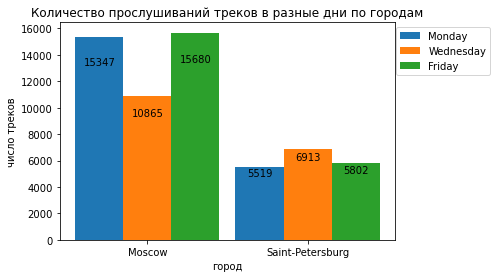

In [49]:
# Параметры разметки для категорий (городов)
cat_par = city_weekday['city']
width = 0.3
x = np.arange(len(cat_par))

# Построение графика
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, pd.Series(city_weekday['Monday']), width, label='Monday')
rects2 = ax.bar(x, pd.Series(city_weekday['Wednesday']), width, label='Wednesday')
rects3 = ax.bar(x + width, pd.Series(city_weekday['Friday']), width, label='Friday')
ax.set(title='Количество прослушиваний треков в разные дни по городам',
       xlabel='город', ylabel='число треков')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)

# Подписи к столбцам графика
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
autolabel(ax.patches, height_factor=0.85)

ax.legend(bbox_to_anchor=(1.3, 1));

Результаты показывают, что относительно среды музыку в Санкт-Петербурге и Москве слушают «зеркально»: в Москве пики приходятся на понедельник и пятницу (с небольшим преобладанием в пятницу), а в среду время прослушивания снижается. В то время как в Санкт-Петербурге среда — день самого большого интереса к музыке, а в понедельник и пятницу он меньше (с небольшим преобладанием в среду).

### Различия предпочтительных направлений музыки в разные дни недели и время  <a id='step_2.2'></a>

Далее найдём ответ на вопрос, какие жанры преобладают в разных городах в разные дни недели утром и вечером. Есть предположение, что в понедельник утром пользователи слушают больше "бодрой" музыки (такой как музыка в жанре поп), чтобы настроиться на "рабочий лад", а вечером пятницы — больше танцевальной музыки (например, электроника), поскольку впереди выходные.

In [50]:
# Данные по Москве
moscow_music = music_project.query('city == "Moscow"')
moscow_music.head()

,user_id,track_name,artist_name,genre_name,city,time,weekday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday


In [51]:
# Данные по Санкт-Петербургу
spb_music = music_project.query('city == "Saint-Petersburg"')
spb_music.head()

,user_id,track_name,artist_name,genre_name,city,time,weekday
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
9,E772D5C0,Pessimist,unknown,dance,Saint-Petersburg,21:20:49,Wednesday


Создадим функцию `genre_weekday()`, которая возвращает список жанров по запрошенному дню недели и времени суток (с указанием промежутка времени).

In [52]:
def genre_weekday(df, day, time1, time2):
    genre_list = df[(df['weekday']==day)&(df['time']>time1)&(df['time']<time2)]
    genre_list_grouped = pd.Series(genre_list
                                       .groupby('genre_name')['genre_name']
                                       .count()
                                       .sort_values(ascending=False)
                                       .head(10),
                                   name='tracks_cnt').reset_index()
    return genre_list_grouped

Cравниваем полученные результаты по таблице для Москвы и Санкт-Петербурга в разные дни недели утром (с 7 до 11) и вечером (с 17 до 23).

In [53]:
# Москва, утро понедельника
moscow_mon_morn = genre_weekday(moscow_music, 'Monday', '07:00:00', '11:00:00')
# Москва, вечер понедельника
moscow_mon_even = genre_weekday(moscow_music, 'Monday', '17:00:00', '23:00:00')
# Москва, утро среды
moscow_wed_morn = genre_weekday(moscow_music, 'Wednesday', '07:00:00', '11:00:00')
# Москва, вечер среды
moscow_wed_even = genre_weekday(moscow_music, 'Wednesday', '17:00:00', '23:00:00')
# Москва, утро пятницы
moscow_fri_morn = genre_weekday(moscow_music, 'Friday', '07:00:00', '11:00:00')
# Москва, вечер пятницы
moscow_fri_even = genre_weekday(moscow_music, 'Friday', '17:00:00', '23:00:00')

Сведём полученные данные по московским топовым жанрам воедино.

In [54]:
moscow_genre = (moscow_mon_morn
                    .merge(moscow_mon_even, on='genre_name', how='outer')
                    .merge(moscow_wed_morn, on='genre_name', how='outer')
                    .merge(moscow_wed_even, on='genre_name', how='outer')
                    .merge(moscow_fri_morn, on='genre_name', how='outer')
                    .merge(moscow_fri_even, on='genre_name', how='outer')
               )
moscow_genre.columns=['genre_name', 'monday_morn', 'monday_even', 'wednesday_morn',
                      'wednesday_even', 'friday_morn', 'friday_even']
moscow_genre

,genre_name,monday_morn,monday_even,wednesday_morn,wednesday_even,friday_morn,friday_even
0,pop,781,717,445,553,789,713
1,dance,549,524,310,411,585,495
2,electronic,480,485,263,317,506,482
3,rock,474,518,276,351,509,517
4,hiphop,286,238,146,174,277,273
5,ruspop,186,149,117,116,207,170
6,world,181,172,84,121,174,208
7,rusrap,175,133,83,107,148,142
8,alternative,164,182,100,130,172,163
9,classical,157,172,115,152,201,163


Аналогичные действия произведём для Санкт-Петербурга.

In [55]:
# Санкт-Петербург, утро понедельника
spb_mon_morn = genre_weekday(spb_music, 'Monday', '07:00:00', '11:00:00')
# Санкт-Петербург, вечер понедельника
spb_mon_even = genre_weekday(spb_music, 'Monday', '17:00:00', '23:00:00')
# Санкт-Петербург, утро среды
spb_wed_morn = genre_weekday(spb_music, 'Wednesday', '07:00:00', '11:00:00')
# Санкт-Петербург, вечер среды
spb_wed_even = genre_weekday(spb_music, 'Wednesday', '17:00:00', '23:00:00')
# Санкт-Петербург, утро пятницы
spb_fri_morn = genre_weekday(spb_music, 'Friday', '07:00:00', '11:00:00')
# Санкт-Петербург, вечер пятницы
spb_fri_even = genre_weekday(spb_music, 'Friday', '17:00:00', '23:00:00')

Сведём полученные данные по петербургским топовым жанрам воедино.

In [56]:
spb_genre = (spb_mon_morn
                    .merge(spb_mon_even, on='genre_name', how='outer')
                    .merge(spb_wed_morn, on='genre_name', how='outer')
                    .merge(spb_wed_even, on='genre_name', how='outer')
                    .merge(spb_fri_morn, on='genre_name', how='outer')
                    .merge(spb_fri_even, on='genre_name', how='outer')
               )
spb_genre.columns=['genre_name', 'monday_morn', 'monday_even', 'wednesday_morn',
                   'wednesday_even', 'friday_morn', 'friday_even']
spb_genre

,genre_name,monday_morn,monday_even,wednesday_morn,wednesday_even,friday_morn,friday_even
0,pop,218.0,263.0,272.0,320.0,211.0,256.0
1,dance,182.0,191.0,232.0,225.0,192.0,210.0
2,rock,162.0,208.0,202.0,243.0,156.0,216.0
3,electronic,147.0,192.0,206.0,241.0,167.0,216.0
4,hiphop,80.0,104.0,99.0,131.0,109.0,97.0
5,ruspop,64.0,53.0,65.0,70.0,45.0,NaN
6,alternative,58.0,72.0,71.0,99.0,55.0,63.0
7,rusrap,55.0,54.0,85.0,71.0,55.0,59.0
8,jazz,44.0,57.0,NaN,NaN,NaN,61.0
9,classical,40.0,71.0,59.0,88.0,56.0,60.0


Отобразим полученную информацию на графиках.

In [57]:
# Создадим функцию построения графика
def top_genre(df, city):
    # параметры разметки для категорий (жанров)
    cat_par = df['genre_name']
    width = 0.15
    x = np.arange(len(cat_par))
    # построение графика
    fig, ax = plt.subplots(figsize=(15,6))
    rects1 = ax.bar(x - width*5/2, pd.Series(df['monday_morn']), width, label='Утро пн.')
    rects2 = ax.bar(x - width*3/2, pd.Series(df['monday_even']), width, label='Вечер пн.')
    rects3 = ax.bar(x - width/2, pd.Series(df['wednesday_morn']), width, label='Утро ср.')
    rects3 = ax.bar(x + width/2, pd.Series(df['wednesday_even']), width, label='Вечер ср.')
    rects4 = ax.bar(x + width*3/2, pd.Series(df['friday_morn']), width, label='Утро пт.')
    rects5 = ax.bar(x + width*5/2, pd.Series(df['friday_even']), width, label='Вечер пт.')
    ax.set(title='ТОП жанров по количеству прослушиваний треков в г.'+city+' по дням недели и суток', 
           xlabel='жанр', ylabel='число треков')
    ax.set_xticks(x)
    ax.set_xticklabels(cat_par)
    ax.legend(bbox_to_anchor=(1.12, 1));

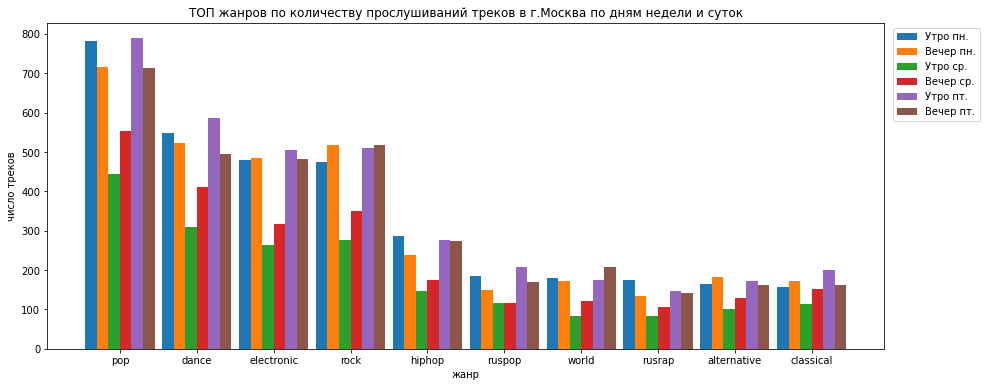

In [58]:
top_genre(moscow_genre, 'Москва')

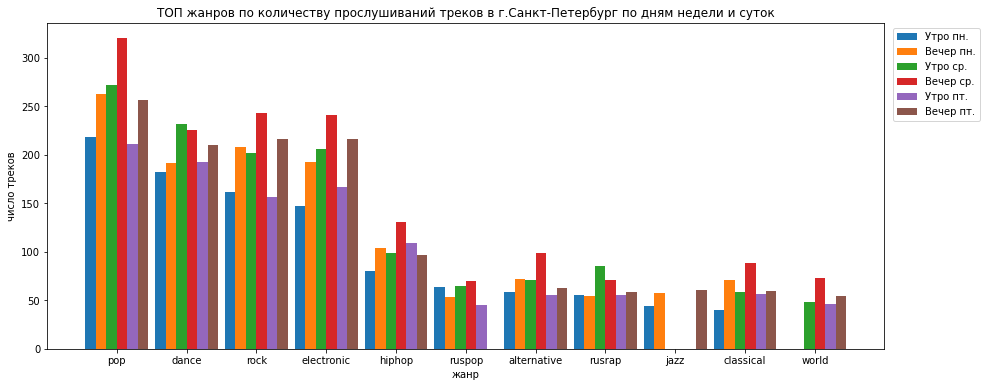

In [59]:
top_genre(spb_genre, 'Санкт-Петербург')

Популярные жанры в понедельник утром в Питере и Москве оказались похожи: везде, как и предполагалось, популярен поп, чуть менее привлекательна танцевальная музыка в стиле dance, затем почти наравне идут rock и electronic. Несмотря на это, концовка топ-10 для двух городов различается: в Питере в топ-10 входит джаз и русский рэп, а в Москве жанр world.

Предпочтения в вечер понедельника по жанрам не сильно отличаются от предпочтений на утро понедельника в обоих городах.

В среду утром и вечером в обоих городах популярны всё те же жанры. Только в Санкт-Петербурге по средам достаточно активно слушают музыку в стиле world (входит в топ-10), и перестают так активно слушать джазовую музыку. В Москве топ-10 сохраняет жанры понедельника.

В конце недели ситуация не меняется. Поп-музыка всё так же на первом месте. Опять разница заметна только в концовке топ-10, где в Питере пятничным вечером тоже присутствует жанр world, но отсутствует русская поп-музыка.

Таким образом, среди жанров поп является безусловным лидером вне зависимости от дня недели и времени суток, а топ-5, в целом, не различается в обеих столицах. При этом видно, что концовка списка более «живая»: для каждого города выделяются более характерные единичные жанры, которые действительно меняют свои позиции в зависимости от дня недели и времени.

### Различия предпочтительных направлений музыки в разных городах  <a id='step_2.3'></a>

Построим следующее предположение: Санкт-Петербург богат своей рэп-культурой, поэтому это направление там слушают чаще, а Москва — город контрастов, но основная масса пользователей слушает попсу.

Проверим, насколько оно соответствует истине.

In [60]:
# Сгруппируем таблицу moscow_music по жанрам и посчитаем число прослушанных композиций в каждом жанре
moscow_top_genre = pd.Series(moscow_music
                                 .groupby('genre_name')['genre_name']
                                 .count()
                                 .sort_values(ascending = False),
                             name='tracks_cnt').reset_index()
# Отобразим топ-10
moscow_top_genre.head(10)

,genre_name,tracks_cnt
0,pop,5892
1,dance,4435
2,rock,3965
3,electronic,3786
4,hiphop,2096
5,classical,1616
6,world,1432
7,alternative,1379
8,ruspop,1372
9,rusrap,1161


In [61]:
# Сгруппируем таблицу spb_music по жанрам и посчитаем число прослушанных композиций в каждом жанре
spb_top_genre = pd.Series(spb_music
                                 .groupby('genre_name')['genre_name']
                                 .count()
                                 .sort_values(ascending = False),
                          name='tracks_cnt').reset_index()
# Отобразим топ-10
spb_top_genre.head(10)

,genre_name,tracks_cnt
0,pop,2431
1,dance,1932
2,rock,1879
3,electronic,1737
4,hiphop,960
5,alternative,649
6,classical,646
7,rusrap,564
8,ruspop,539
9,world,515


В обоих городах, кроме абсолютно популярного жанра поп, есть направление русской популярной музыки. Значит, что интерес к этому жанру широк и в Москве, и в Санкт-Петербурге. Рэп занимает в обоих городах близкие позиции, но в Санкт-Петербурге он немного популярнее, чем в Москве.

### Вывод  <a id='step_2.4'></a>

В целом, в понедельник и пятницу наблюдается больше прослушиваний музыки, чем в среду. Возможно, это связано с тем, что по средам пользователи немного больше вовлечены в работу. С другой стороны, в Москве намного больше прослушиваний, чем в Санкт-Петербурге, а это значит, что тенденция в одном городе может оказывать сильное влияние на тенденцию общей выборки. 

Действительно, по городам наблюдается следующее различие: в Москве пики приходятся на понедельник и пятницу (с небольшим преобладанием в пятницу), а в среду время прослушивания снижается; в то время как в Санкт-Петербурге среда — день самого большого интереса к музыке, а в понедельник и пятницу он меньше (с небольшим преобладанием в среду).

Анализ различий в жанрах по городам показал следующие тенденции. Популярные жанры в понедельник утром в Питере и Москве оказались похожи: везде популярен поп, чуть менее привлекательна танцевальная музыка в стиле dance, затем почти наравне идут rock и electronic. Несмотря на это, концовка топ-10 для двух городов различается: в Питере в топ-10 входит джаз и русский рэп, а в Москве жанр world. Предпочтения в вечер понедельника по жанрам не сильно отличаются от предпочтений на утро понедельника в обоих городах. В среду утром и вечером в обоих городах популярны всё те же жанры. Только в Санкт-Петербурге по средам достаточно активно слушают музыку в стиле world (входит в топ-10), и перестают так активно слушать джазовую музыку. В Москве топ-10 сохраняет жанры понедельника. В конце недели ситуация не меняется. Поп-музыка всё так же на первом месте. Разница заметна только в концовке топ-10, где в Питере пятничным вечером тоже присутствует жанр world, но отсутствует русская поп-музыка. 

Таким образом, среди жанров поп является безусловным лидером вне зависимости от дня недели и времени суток, а топ-5, в целом, не различается в обеих столицах. При этом видно, что концовка списка более «живая»: для каждого города выделяются более характерные единичные жанры, которые действительно меняют свои позиции в зависимости от дня недели и времени.

В обоих городах, кроме абсолютно популярного жанра поп, есть направление русской популярной музыки. Значит, что интерес к этому жанру широк и в Москве, и в Санкт-Петербурге. Рэп занимает в обоих городах близкие позиции, но в Санкт-Петербурге он немного популярнее, чем в Москве.

## Общий вывод <a id='step_3'></a>

Данное исследование включает в себя **анализ информации о прослушивании музыки пользователями**. При этом каждое из зафиксированных в данных прослушиваний характеризуется семью признаками: идентификатором пользователя, названием трека, именем исполнителя трека, названием жанра трека, городом, временем и днём недели, в которые пользователь слушал трек.

**В данных встречается** 60 126 прослушиваний музыки, в которых 41 315 уникальных пользователей. Из этих пользователей 29 043 человека прослушивали музыку в Москве, а 12 305 - в Санкт-Петербурге. Поскольку число уникальных пользователей в выборке меньше суммарного значения пользователей из Москвы и Санкт-Петербурга выше, это говорит о том, что некоторые пользователи слушали музыку и в Москве, и в Санкт-Петербурге. В данных встречается 46 910 уникальных композиций по названию трека и 43 344 уникальных исполнителя. Отметим, что 104 пользователя слушали более 10 треков с разными названиями, а 98 пользователей слушали более 10 треков с разными исполнителями. При этом некоторые из них слушали до 42 треков с разными названиями и до 38 треков с разными исполнителями. Также у нас имеется около 31 800 пользователей, которые включали либо только один трек, либо треки, имеющие одинаковые названия, либо треки, принадлежащие одному исполнителю. Кроме того, данные содержат композиции, принадлежащие к 280 разным жанрам.

Вся **информация представлена** за Понедельники, Среды и Пятницы и временной период с 08:00:00 до 22:00:59.

В исследовании были выдвинуты **рабочие гипотезы**:
* музыку в двух городах — Москве и Санкт-Петербурге — слушают в разном режиме;
* списки десяти самых популярных жанров в разное время недели и суток имеют характерные отличия;
* население двух городов предпочитает разные музыкальные жанры.

На основании анализа, были сделаны **следующие выводы**. Москва и Санкт-Петербург сходятся во вкусах: везде преобладает популярная музыка. При этом зависимости предпочтений от дня недели в каждом отдельном городе нет — люди постоянно слушают то, что им нравится. Также и нет существенных отличий в предпочтениях по жанрам между городами (топ-5 одинаков и включает в себя популярную музыку, танцевальную, электронную, рок музыку и хип-хоп. При этом по количеству прослушиваний треков в разные дни недели между городами наблюдается зеркальность относительно среды: Москва больше слушает в понедельник и пятницу, а Петербург наоборот - больше в среду, но меньше в понедельник и пятницу.

В результате **первая гипотеза подтверждена, вторая гипотеза не подтверждена и третья - не подтверждена**.

## Рекомендации <a id='step_4'></a>

На основе приведённого исследования выдвинуты **следующие рекомендации** по удержанию интереса и привлечению новых пользователей в портал Яндекс.Музыка для Москвы и Санкт-Петербурга.

**1.** Предлагать пробный бесплатный период прослушивания для пользователей из Санкт-Петербурга по понедельникам и пятницам с целью привлечения большего количества клиентов.

**2.** Предлагать пробный бесплатный период прослушивания для пользователей из Санкт-Петербурга по средам с целью привлечения большего количества клиентов.

**3.** Предлагать клиентам в обоих городах в рекомендуемом музыку стиля поп, дэнс, электронную, рок и хип-хоп - вне зависимости от дня недели и суток.

**4.** Создать сервис или приложение, считывающее предпочтения пользователя Яндекс.Музыка, "угадывающее" настроение пользователя на основе данных его аккаунта, и воспроизводящий музыку под его настроение. Первоначально при недостаточно данных могут быть воспроизведены популярные треки из топ-5 жанров (указаны в п.3).